In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
#!git clone https://github.com/yohanesnuwara/volve-machine-learning

In [3]:
#!pip install lasio
import lasio

In [4]:
import glob
import os

# get all paths and alphabetically ordered
paths = sorted(glob.glob(os.path.join("volve-machine-learning/well_logs", "*.LAS")))
well_df = [0] * 5

In [5]:
paths

['volve-machine-learning/well_logs/15_9-F-11A.LAS',
 'volve-machine-learning/well_logs/15_9-F-11B.LAS',
 'volve-machine-learning/well_logs/15_9-F-1A.LAS',
 'volve-machine-learning/well_logs/15_9-F-1B.LAS',
 'volve-machine-learning/well_logs/15_9-F-1C.LAS']

In [6]:
for i in range(len(paths)):
  # read with lasio
    well = lasio.read(paths[i])
  # convert to dataframe
    df = well.df()
    well_df[i] = df.reset_index()

  # in this dataframe, depth is positioned as index, not as column
  # so better to change depth index to column


well1, well2, well3, well4, well5 = well_df


In [7]:
well1.columns

Index(['DEPTH', 'ABDCQF01', 'ABDCQF02', 'ABDCQF03', 'ABDCQF04', 'BS', 'CALI',
       'DRHO', 'DT', 'DTS', 'GR', 'NPHI', 'PEF', 'RACEHM', 'RACELM', 'RD',
       'RHOB', 'RM', 'ROP', 'RPCEHM', 'RPCELM', 'RT'],
      dtype='object')

# First display of Data

<ipython-input-8-32e783bb962d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  well.sort_values(by = ['DEPTH'], ascending = True, inplace = True)
<ipython-input-8-32e783bb962d>:30: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(1.1)


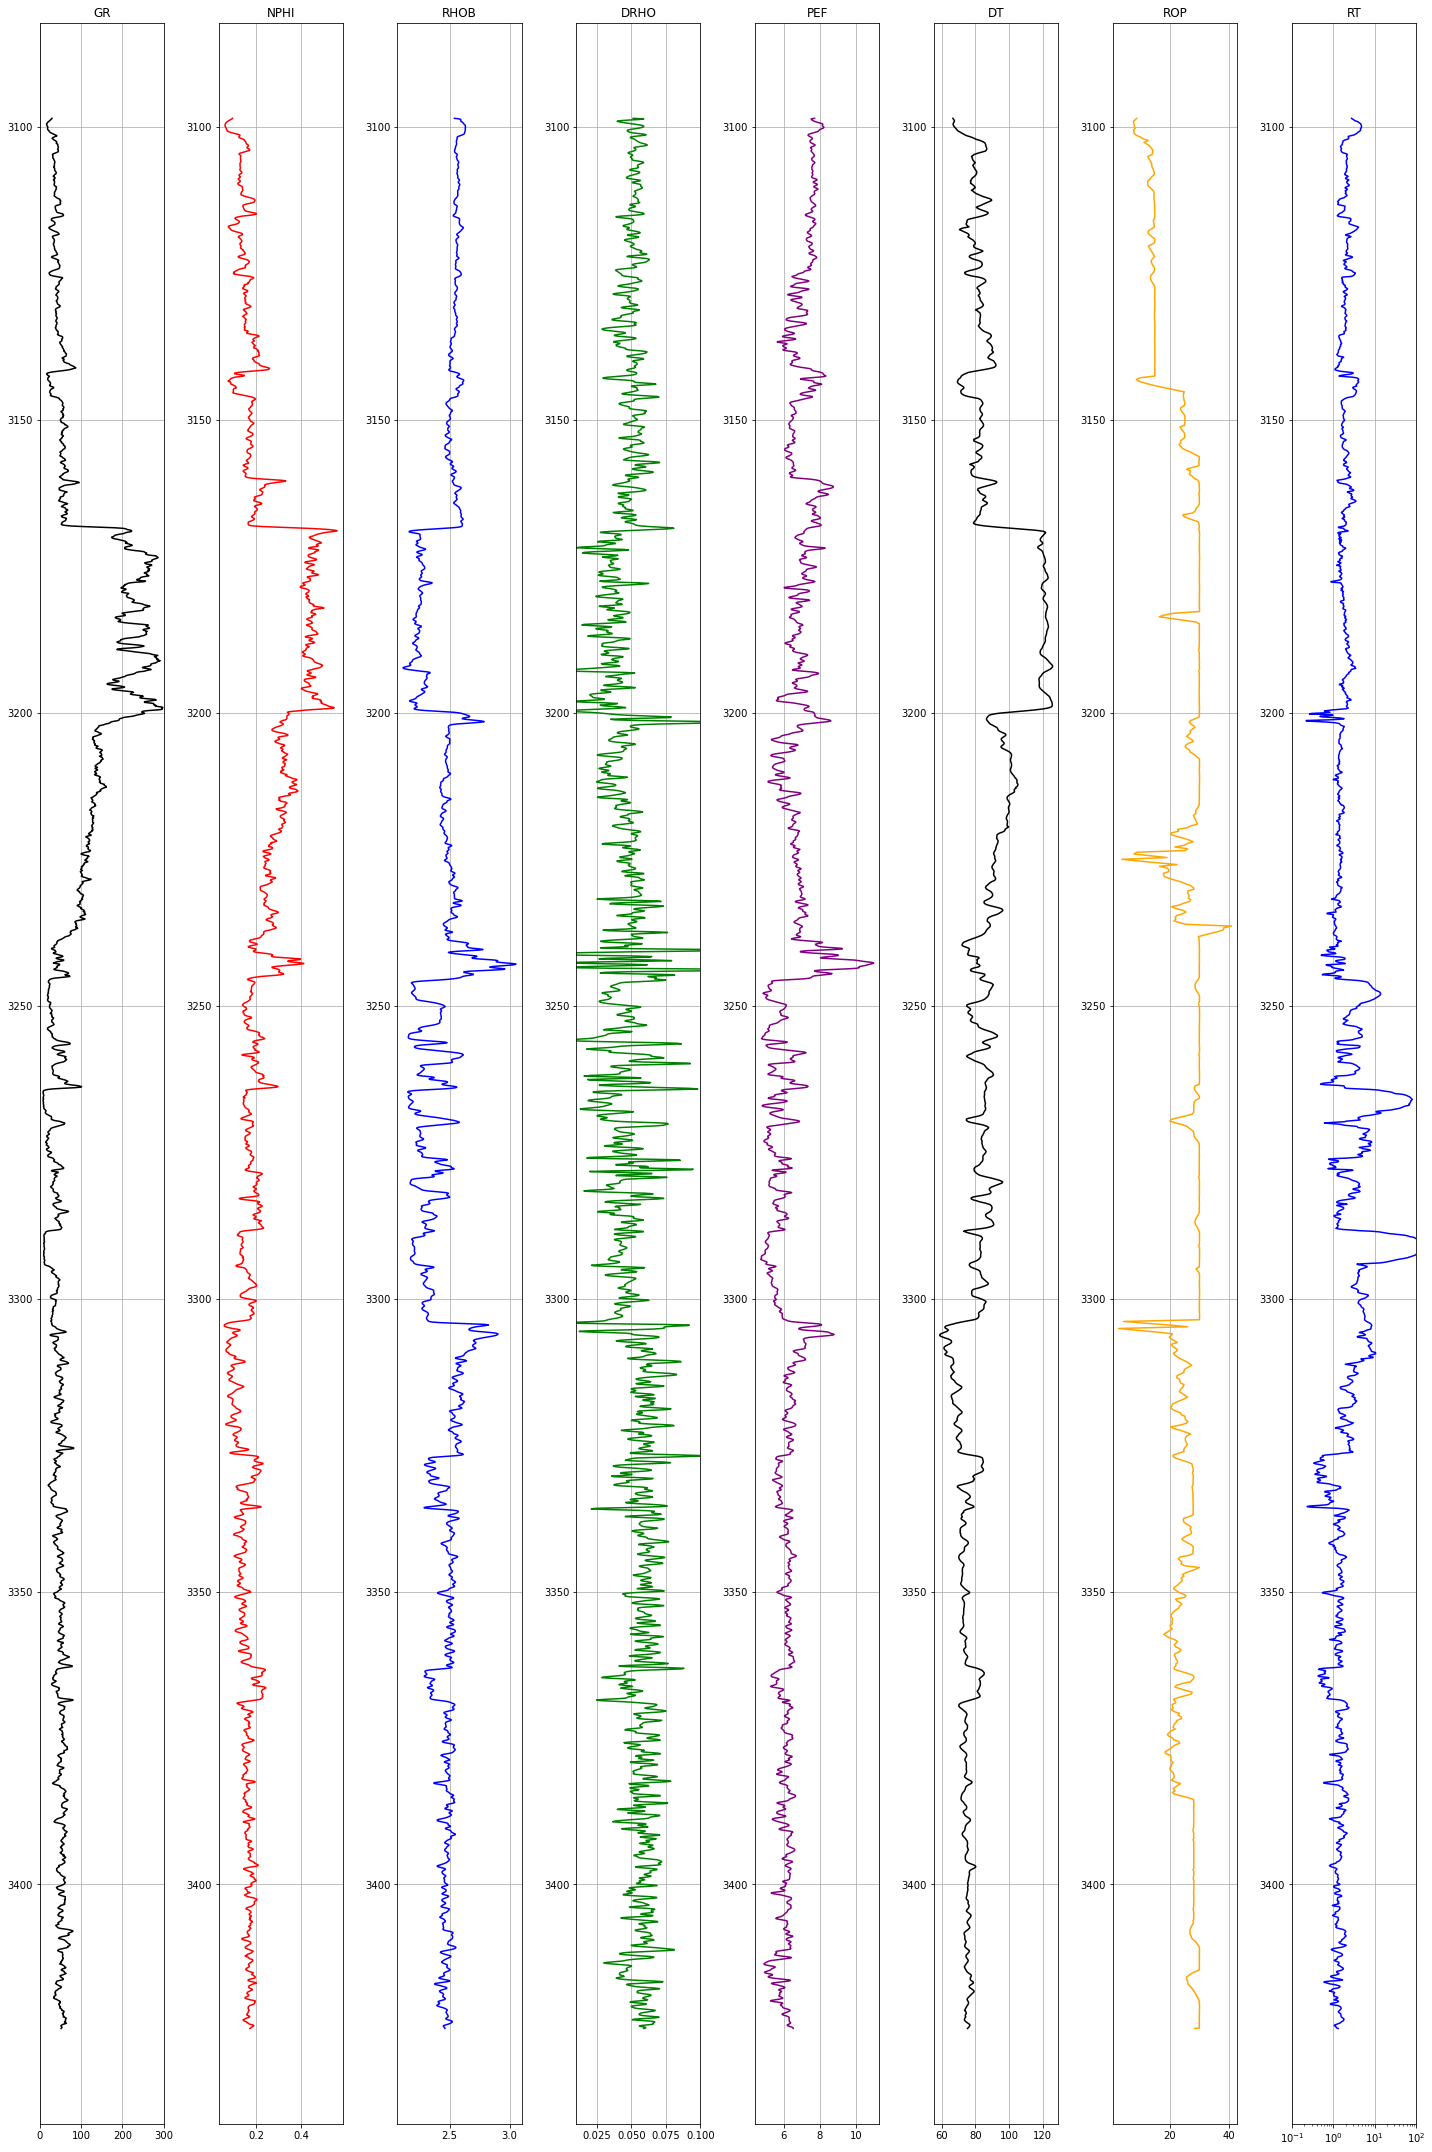

In [8]:
# Display train well data
well = well4# train wells: well1, well3, test wells: well4
well = well[well['GR'].notna() & well['NPHI'].notna() &well['RHOB'].notna()& well['DRHO'].notna()&well['PEF'].notna()&well['DT'].notna()&well['ROP'].notna()]
well.sort_values(by = ['DEPTH'], ascending = True, inplace = True)
# define what logs are we going to us
logs = ['GR','NPHI', 'RHOB', 'DRHO', 'PEF', 'DT', 'ROP', 'RT']

# create the subplots; ncols equals the number of logs
fig, ax = plt.subplots(nrows=1, ncols=len(logs), figsize=(20,30))

# looping each log to display in the subplots

colors = ['black', 'red', 'blue', 'green', 'purple', 'black', 'orange', 'blue']

for i in range(len(logs)):
    if i == 7:
        #for resistivity, semilog plot:
        ax[i].semilogx(well[logs[i]], well['DEPTH'], color=colors[i])
    else:
        # for non-resistivity, normal plot
        ax[i].plot(well[logs[i]], well['DEPTH'], color=colors[i])
  
    ax[i].set_title(logs[i])
    ax[i].grid(True)
    ax[i].axes.invert_yaxis()

ax[0].set_xlim(0, 300)
ax[7].set_xlim(.1, 100)
ax[3].set_xlim(.01, .1)
plt.tight_layout(1.1)
plt.show()
#fig.savefig('Logs.png')

In [9]:
len(well1), len(well3), len(well4)

(35735, 35361, 33191)

In [10]:
well1_df = well1[well1['GR'].notna() & well1['NPHI'].notna() &well1['RHOB'].notna()& well1['DRHO'].notna()&well1['PEF'].notna()&well1['DT'].notna()&well1['ROP'].notna()]
well3_df = well3[well3['GR'].notna() & well3['NPHI'].notna() &well3['RHOB'].notna()& well3['DRHO'].notna()&well3['PEF'].notna()&well3['DT'].notna()&well3['ROP'].notna()]
well4_df = well4[well4['GR'].notna() & well4['NPHI'].notna() &well4['RHOB'].notna()& well4['DRHO'].notna()&well4['PEF'].notna()&well4['DT'].notna()&well4['ROP'].notna()]
print(well1_df.DEPTH.min(), well1_df.DEPTH.max(), len(well1_df['DEPTH']))
print(well3_df.DEPTH.min(), well3_df.DEPTH.max(), len(well3_df['DEPTH']))
print(well4_df.DEPTH.min(), well4_df.DEPTH.max(), len(well4_df['DEPTH']))


2577.0 3723.3 11464
2619.8 3642.1 10146
3098.5 3424.6 3262


In [11]:
len(well1_df['DEPTH'])+ len(well3_df['DEPTH'])+ len(well4_df['DEPTH'])

24872

### Only 24,872 usable points, 5340 of which will be for test set

In [12]:
#with pd.ExcelWriter('Wells_df.xlsx') as writer:  
   #well1.to_excel(writer, sheet_name='well1(15_9-F-11A)')
    #well3.to_excel(writer, sheet_name='well3(15_9-F-1A)')
    #well4.to_excel(writer, sheet_name='well4(15_9-F-1B)')
    
    #This was done to manually include my target column, Lithology because the lithology column comes from a pdf report

In [13]:

well1 = pd.read_excel('Wells_df.xlsx',
              sheet_name='well1(15_9-F-11A)',
                index_col=0)
well3 = pd.read_excel('Wells_df.xlsx',
              sheet_name='well3(15_9-F-1A)',
                index_col=0)
well4 = pd.read_excel('Wells_df.xlsx',
              sheet_name='well4(15_9-F-1B)',
                index_col=0)
well1_df = well1[well1['GR'].notna() & well1['NPHI'].notna() &well1['RHOB'].notna()& well1['DRHO'].notna()&well1['PEF'].notna()&well1['DT'].notna()&well1['ROP'].notna()]
well3_df = well3[well3['GR'].notna() & well3['NPHI'].notna() &well3['RHOB'].notna()& well3['DRHO'].notna()&well3['PEF'].notna()&well3['DT'].notna()&well3['ROP'].notna()]
well4_df = well4[well4['GR'].notna() & well4['NPHI'].notna() &well4['RHOB'].notna()& well4['DRHO'].notna()&well4['PEF'].notna()&well4['DT'].notna()&well4['ROP'].notna()]


In [14]:
well1_df['Lithology (0:shale, 1:lime, 2: sand)'].value_counts(), well3_df['Lithology (0:shale, 1:lime, 2: sand)'].value_counts(), well4_df['Lithology (0:shale, 1:lime, 2: sand)'].value_counts()


(1.0    7311
 2.0    3534
 0.0     489
 Name: Lithology (0:shale, 1:lime, 2: sand), dtype: int64,
 1.0    5870
 2.0    3444
 0.0     710
 Name: Lithology (0:shale, 1:lime, 2: sand), dtype: int64,
 2.0    1797
 1.0    1010
 0.0     420
 Name: Lithology (0:shale, 1:lime, 2: sand), dtype: int64)

# Drop unneccesary columns for my analysis

In [15]:
well1_df.drop(['ABDCQF01','ABDCQF02', 'ABDCQF03', 'ABDCQF04','BS', 'CALI','DTS','RACEHM', 'RACELM', 'RD', 'RM','RPCEHM', 'RPCELM'], axis = 1, inplace =True)
well3_df.drop(['ABDCQF01','ABDCQF02', 'ABDCQF03', 'ABDCQF04','BS', 'CALI','DTS','RACEHM', 'RACELM','RPCEHM', 'RPCELM'], axis = 1, inplace =True)
well4_df.drop(['ABDCQF01','ABDCQF02', 'ABDCQF03', 'ABDCQF04','BS', 'CALI','DTS','RACEHM', 'RACELM', 'RD', 'RM','RPCEHM', 'RPCELM'], axis = 1, inplace =True)


/Users/matthewdupree/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [16]:
#well1_df.drop(['DEPTH'], axis=1, inplace = True)
#well3_df.drop(['DEPTH'], axis=1, inplace = True)
#well4_df.drop(['DEPTH'], axis=1, inplace = True)


In [17]:
wells_data = well1_df.append([well3_df])
well4_df.drop(['NBGRCFM'],axis=1, inplace = True)
well4_df.dropna(inplace=True)
wells_data.dropna(inplace = True)

<ipython-input-17-eed510a10539>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  well4_df.dropna(inplace=True)


In [18]:
well4_df['Lithology (0:shale, 1:lime, 2: sand)'].value_counts()/3227*100 
# percentage of each class represented in test data

2.0    55.686396
1.0    31.298420
0.0    13.015184
Name: Lithology (0:shale, 1:lime, 2: sand), dtype: float64

In [19]:
wells_data['Lithology (0:shale, 1:lime, 2: sand)'].value_counts()/21358*100
# percentage of each class represented in train data

1.0    61.714580
2.0    32.671598
0.0     5.613822
Name: Lithology (0:shale, 1:lime, 2: sand), dtype: float64

In [20]:
well4_df.rename(columns={"Lithology (0:shale, 1:lime, 2: sand)": "Lithology"}, inplace = True)
wells_data.rename(columns={"Lithology (0:shale, 1:lime, 2: sand)": "Lithology"}, inplace = True)

/Users/matthewdupree/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


# Random Forest  Baseline

In [21]:
well4_df.reset_index(drop=True, inplace = True)
wells_data.reset_index(drop=True, inplace = True)

In [22]:
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score

In [23]:
x_train_val, y_train_val = wells_data[['DEPTH','DRHO','DT','GR','NPHI','PEF','RHOB','ROP', 'RT']], wells_data['Lithology']
x_test, y_test = well4_df[['DEPTH','DRHO','DT','GR','NPHI','PEF','RHOB','ROP', 'RT']], well4_df['Lithology']
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=.25)

In [24]:
# x_train_val, x_test, y_train_val, y_test = train_test_split(wells_data[['DEPTH','DRHO','DT','GR','NPHI','PEF','RHOB','ROP', 'RT']], wells_data['Lithology'], test_size=0.2)


In [25]:
x_train.shape, x_test.shape, x_val.shape

((16018, 9), (3227, 9), (5340, 9))

In [26]:
rf = RandomForestClassifier()
rf.fit(x_train_val, y_train_val)

RandomForestClassifier()

In [27]:
rf1 = RandomForestClassifier(n_estimators = 100, max_features = 3, n_jobs=-1)
rf1.fit(x_train[['DT','GR','NPHI','PEF','RHOB','ROP']],y_train)
y_predict = rf1.predict(x_test[['DT','GR','NPHI','PEF','RHOB','ROP']])

In [28]:
rf1.score(x_test[['DT','GR','NPHI','PEF','RHOB','ROP']], y_test)

0.8329718004338394

In [29]:
f1_score(y_test,y_predict, average = 'micro')

0.8329718004338394

In [30]:
print(rf1.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 3, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [31]:
metrics.confusion_matrix(y_test,y_predict)

array([[ 417,    3,    0],
       [ 174,  563,  273],
       [   0,   89, 1708]])

In [32]:
print('''Shale recall: {:.4f}
Limestone recall:{:.4f}
Sand recall: {:.4f}
'''.format(
    ((metrics.confusion_matrix(y_test,y_predict)[0][0])/(sum(metrics.confusion_matrix(y_test,y_predict)[0]))), 
    ((metrics.confusion_matrix(y_test,y_predict)[1][1])/(sum(metrics.confusion_matrix(y_test,y_predict)[1]))), 
    ((metrics.confusion_matrix(y_test,y_predict)[2][2])/(sum(metrics.confusion_matrix(y_test,y_predict)[2]))))
     )


Shale recall: 0.9929
Limestone recall:0.5574
Sand recall: 0.9505



# Random Forest Hyperparameter tuning

In [33]:
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 200, num = 100)]
max_features = [ 1, 2, 3]
max_depth = [int(x) for x in np.linspace(2, 15, num = 10)]
max_depth.append(None)
min_samples_split = [2,3]
min_samples_leaf = [1, 2,3, 4, 5, 6]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'max_features':max_features,
               'bootstrap': bootstrap,
              'min_samples_split':min_samples_split,
              'min_samples_leaf': min_samples_leaf}


In [34]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 100, cv = 5, verbose=2, 
                                n_jobs = -1, scoring = 'f1_micro', error_score = 'raise')

In [35]:
rf_random.fit(x_train_val[['DT','GR','NPHI','PEF','RHOB','ROP']], y_train_val)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=RandomForestClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 3, 4, 6, 7, 9, 10, 12,
                                                      13, 15, None],
                                        'max_features': [1, 2, 3],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                                        'min_samples_split': [2, 3],
                                        'n_estimators': [1, 3, 5, 7, 9, 11, 13,
                                                         15, 17, 19, 21, 23, 25,
                                                         27, 29, 31, 33, 35, 37,
                                                         39, 41, 43, 45, 47, 49,
                                                         51, 53, 55, 57, 59, ...]},
                   scoring='f1_micro

In [36]:
rf_random.best_params_

{'n_estimators': 77,
 'min_samples_split': 3,
 'min_samples_leaf': 4,
 'max_features': 2,
 'max_depth': 4,
 'bootstrap': True}

In [37]:
y_predict = rf_random.predict(x_test[['DT','GR','NPHI','PEF','RHOB','ROP']])
f1_score(y_test,y_predict, average = 'micro')


0.8112798264642083

In [38]:
def make_confusion_matrix(confusion_matrix):
    plt.figure(dpi=80)
    sns.heatmap(confusion_matrix, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['Shale', 'Limestone', 'Sandstone'],
           yticklabels=['Shale', 'Limestone', 'Sandstone']);
    plt.xlabel('Prediction')
    plt.ylabel('Actual')

In [39]:
metrics.confusion_matrix(y_test,y_predict)

array([[ 417,    3,    0],
       [ 153,  563,  294],
       [   0,  159, 1638]])

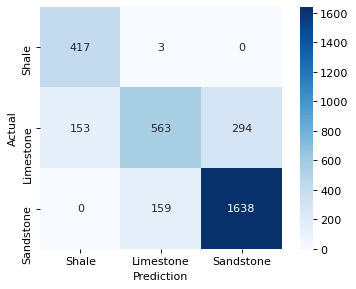

In [40]:
make_confusion_matrix(metrics.confusion_matrix(y_test,y_predict))
fig.savefig('rf_test_matrix.png')

In [41]:
print('''Shale recall: {:.4f}
Limestone recall:{:.4f}
Sand recall: {:.4f}
'''.format(
    ((metrics.confusion_matrix(y_test,y_predict)[0][0])/(sum(metrics.confusion_matrix(y_test,y_predict)[0]))), 
    ((metrics.confusion_matrix(y_test,y_predict)[1][1])/(sum(metrics.confusion_matrix(y_test,y_predict)[1]))), 
    ((metrics.confusion_matrix(y_test,y_predict)[2][2])/(sum(metrics.confusion_matrix(y_test,y_predict)[2]))))
     )


Shale recall: 0.9929
Limestone recall:0.5574
Sand recall: 0.9115



In [42]:
y_predict = pd.Series(y_predict)
y_test.reset_index(drop=True, inplace = True)

In [43]:
well4_df['Lithology_rf']= pd.Series(y_predict)

<ipython-input-43-851996f17c96>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  well4_df['Lithology_rf']= pd.Series(y_predict)


In [44]:
lithology_numbers = {0: {'lith':'Shale', 'hatch':'--', 'color':'#bebebe'},
                    1: {'lith':'Limestone', 'hatch':'+', 'color':'#80ffff'},
                    2: {'lith':'Sandstone', 'hatch': '..', 'color':'#ffff00'},
                    }

df_lith = pd.DataFrame.from_dict(lithology_numbers, orient='index')
df_lith.index.name = 'LITHOLOGY'
df_lith

,lith,hatch,color
LITHOLOGY,,,
0,Shale,--,#bebebe
1,Limestone,+,#80ffff
2,Sandstone,..,#ffff00


In [45]:
from sklearn.metrics import confusion_matrix
rf_random.predict_proba(x_val[['DT','GR','NPHI','PEF','RHOB','ROP']])

array([[0.96167029, 0.0047388 , 0.03359091],
       [0.0013215 , 0.92074614, 0.07793236],
       [0.00245379, 0.0037765 , 0.99376972],
       ...,
       [0.0013215 , 0.93449393, 0.06418457],
       [0.00929799, 0.1250028 , 0.86569921],
       [0.00426384, 0.27468279, 0.72105336]])

In [47]:
metrics.confusion_matrix(y_test,y_predict)

array([[ 417,    3,    0],
       [ 153,  563,  294],
       [   0,  159, 1638]])

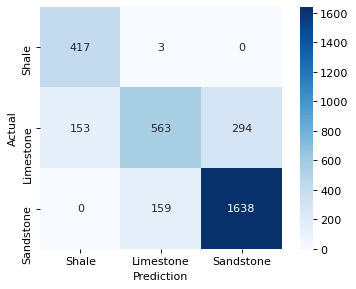

In [48]:
make_confusion_matrix(metrics.confusion_matrix(y_test,y_predict))


In [50]:
well4_df

,DEPTH,DRHO,DT,GR,NPHI,PEF,RHOB,ROP,RT,Lithology,Lithology_rf
0,3102.0,0.0517,79.8155,31.5956,0.1390,7.5853,2.5614,11.0552,2.3253,1.0,1.0
1,3102.1,0.0525,80.5183,32.6119,0.1452,7.5500,2.5602,11.6189,2.1443,1.0,1.0
2,3102.2,0.0530,81.7971,35.0596,0.1488,7.5027,2.5584,12.1826,1.9331,1.0,1.0
3,3102.3,0.0535,82.8895,37.2475,0.1485,7.4674,2.5567,12.7405,1.8021,1.0,1.0
4,3102.4,0.0541,83.7466,39.2453,0.1522,7.4579,2.5556,12.2827,1.7233,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3222,3424.2,0.0557,76.4480,51.6833,0.1875,6.2810,2.4461,29.9912,1.1323,2.0,2.0
3223,3424.3,0.0579,76.1982,52.9685,0.1850,6.3838,2.4506,29.9845,1.1693,2.0,2.0
3224,3424.4,0.0603,75.8560,54.0012,0.1785,6.4731,2.4563,29.9778,1.1792,2.0,2.0
3225,3424.5,0.0603,75.5494,52.6933,0.1777,6.5220,2.4590,29.9621,1.2081,2.0,2.0


### Visualization of logs, including lithology prediction from random forest

<ipython-input-79-2416f2731693>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  well.sort_values(by = ['DEPTH'], ascending = True, inplace = True)
<ipython-input-79-2416f2731693>:43: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(1.1)


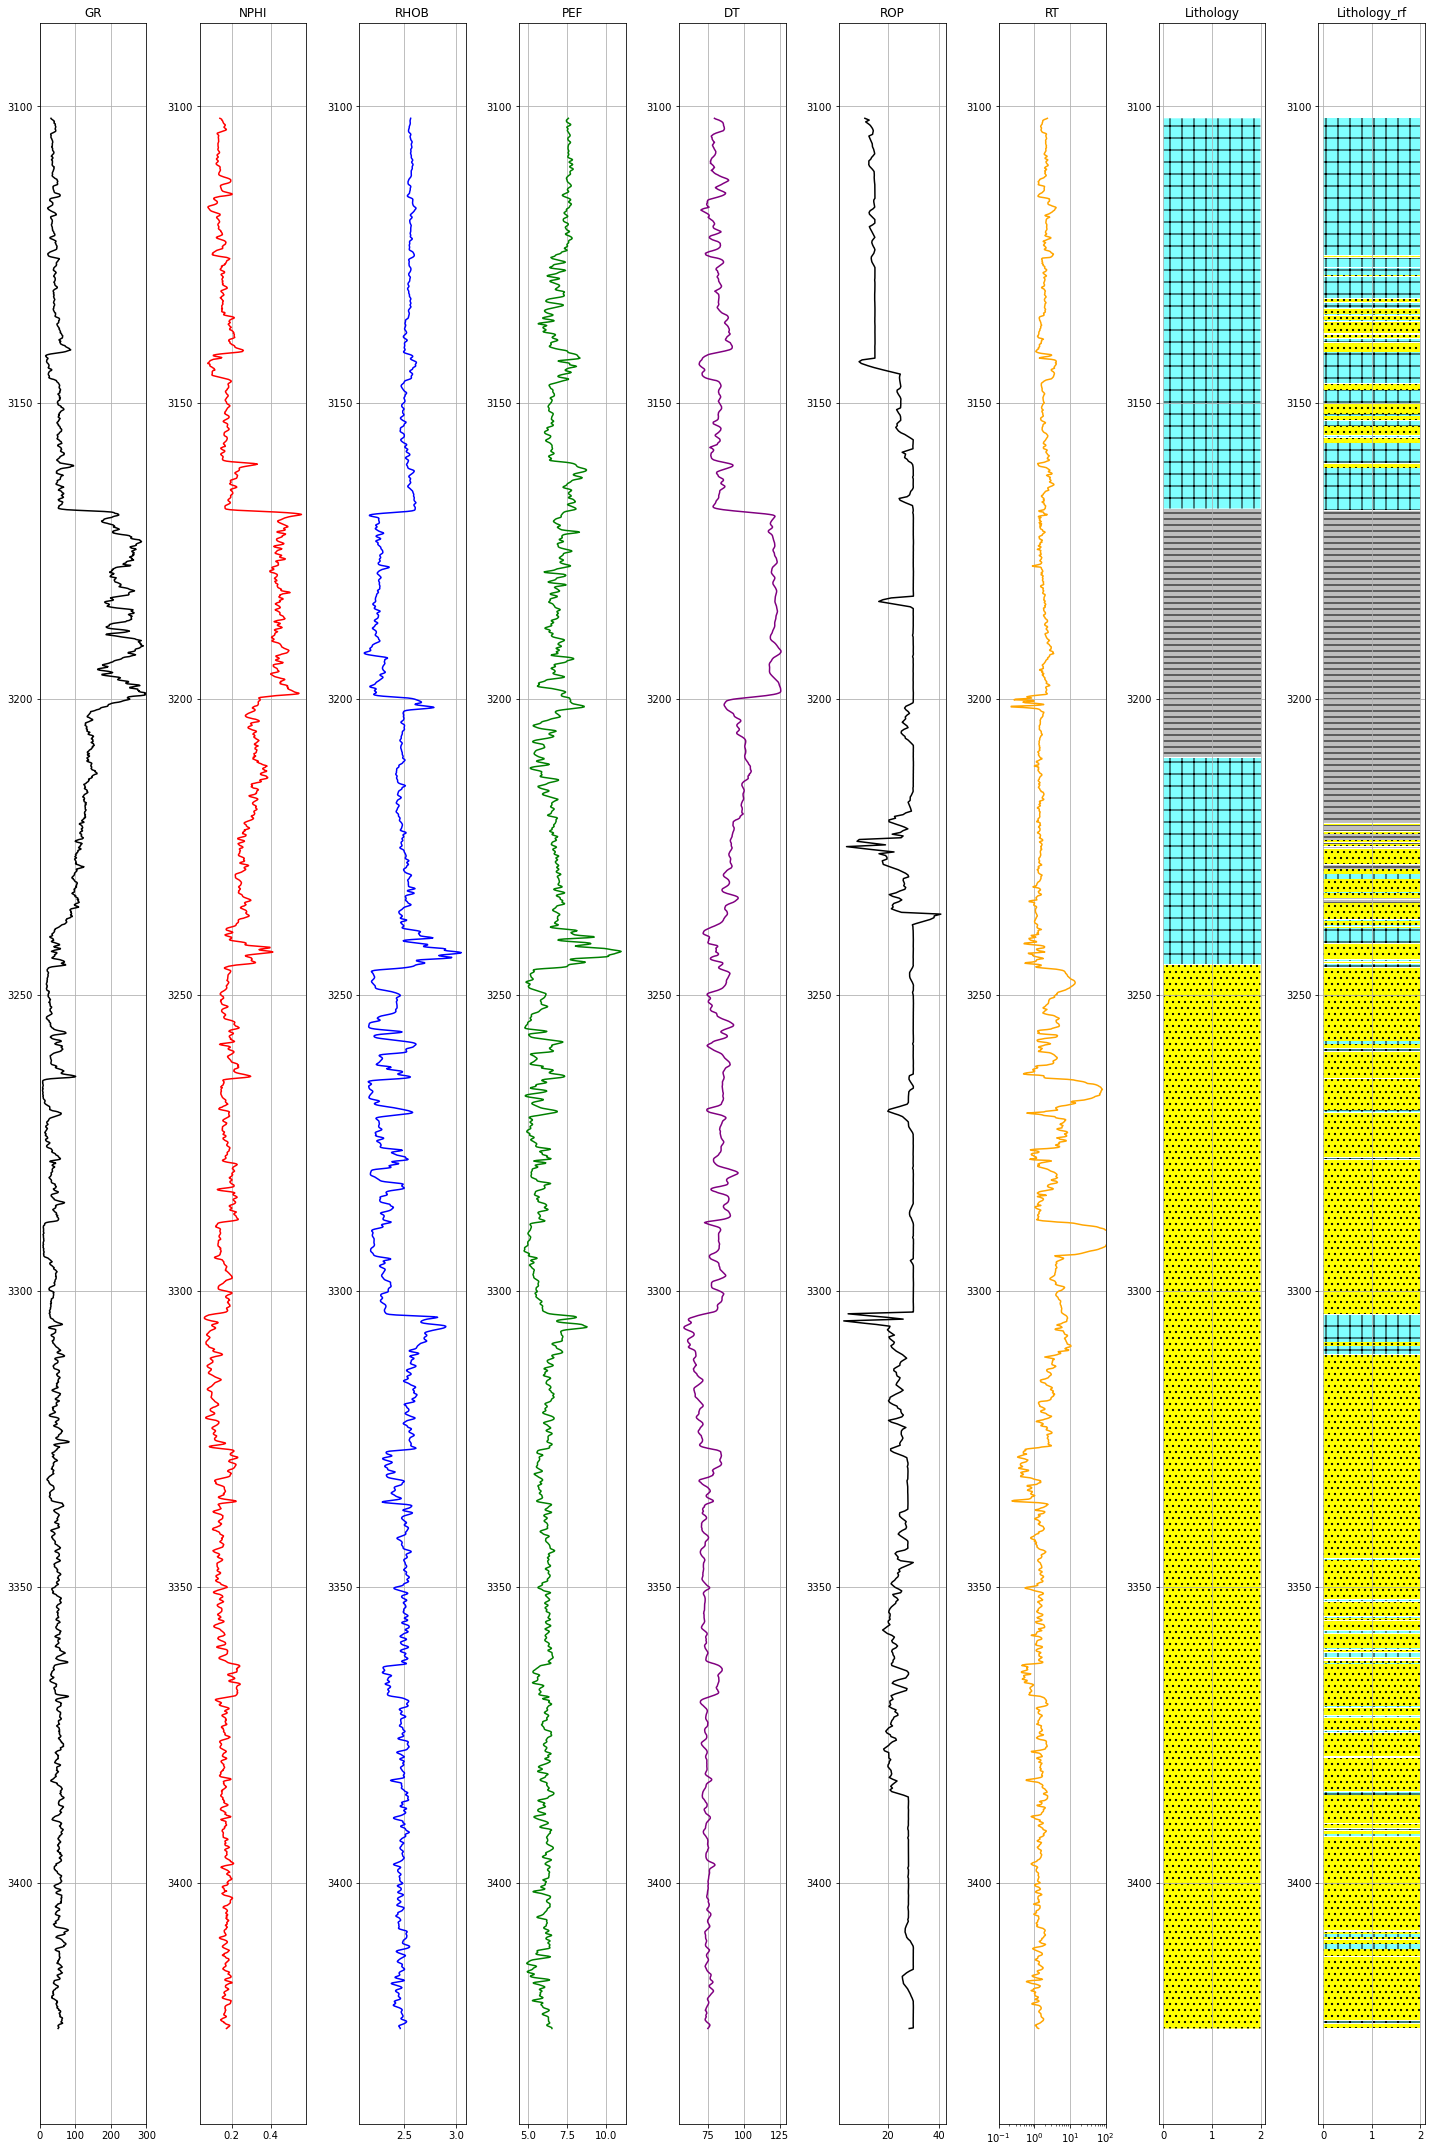

In [79]:
well = well4_df
well.sort_values(by = ['DEPTH'], ascending = True, inplace = True)
logs = ['GR','NPHI', 'RHOB', 'PEF', 'DT', 'ROP', 'RT', 'Lithology', 'Lithology_rf']

# create the subplots; ncols equals the number of logs
fig, ax = plt.subplots(nrows=1, ncols=len(logs), figsize=(20,30))

# looping each log to display in the subplots

colors = ['black', 'red', 'blue', 'green', 'purple', 'black', 'orange', 'blue', 'black', 'black']

for i in range(len(logs)):
    if i == 6:
        #for resistivity, semilog plot:
        ax[i].semilogx(well[logs[i]], well['DEPTH'], color=colors[i])
        
    elif i ==7:
        for key in lithology_numbers.keys():
            color = lithology_numbers[key]['color']
            hatch = lithology_numbers[key]['hatch']
            ax[i].fill_betweenx(well['DEPTH'], 0, well["Lithology"], where=(well["Lithology"]==key),
                         facecolor=color, hatch=hatch)
            ax[i].fill_betweenx(well['DEPTH'], 2, well["Lithology"], where=(well["Lithology"]==key),
                         facecolor=color, hatch=hatch)
    elif i==8:
        for key in lithology_numbers.keys():
            color = lithology_numbers[key]['color']
            hatch = lithology_numbers[key]['hatch']
            ax[i].fill_betweenx(well['DEPTH'], 0, well["Lithology_rf"], where=(well["Lithology_rf"]==key),
                         facecolor=color, hatch=hatch)
            ax[i].fill_betweenx(well['DEPTH'], 2, well["Lithology_rf"], where=(well["Lithology_rf"]==key),
                         facecolor=color, hatch=hatch)
    else:
        # for non-resistivity, normal plot
        ax[i].plot(well[logs[i]], well['DEPTH'], color=colors[i])
  
    ax[i].set_title(logs[i])
    ax[i].grid(True)
    ax[i].axes.invert_yaxis()

ax[0].set_xlim(0, 300)
ax[6].set_xlim(.1, 100)
plt.tight_layout(1.1)
plt.show()
fig.savefig('Well_Logs.png')

# XGBoost prediction

In [53]:
import xgboost as xgb

In [54]:
gbm = xgb.XGBClassifier( 
                        n_estimators=30000,
                        max_depth=4,
                        objective='multi:softprob', #new objective
                        learning_rate=.05, 
                        subsample=.8,
                        min_child_weight=3,
                        colsample_bytree=.8
                       )

eval_set=[(x_train[['DT','GR','NPHI','PEF','RHOB','ROP']],y_train),(x_val[['DT','GR','NPHI','PEF','RHOB','ROP']],y_val)]
fit_model = gbm.fit( 
                    x_train[['DT','GR','NPHI','PEF','RHOB','ROP']], y_train, 
                    eval_set=eval_set,
                    eval_metric='merror', #new evaluation metric: classification error (could also use AUC, e.g.)
                    early_stopping_rounds=50,
                    verbose=False
                   )
metrics.confusion_matrix(y_val, gbm.predict(x_val[['DT','GR','NPHI','PEF','RHOB','ROP']], ntree_limit=gbm.best_ntree_limit))

/Users/matthewdupree/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


array([[ 302,    0,    0],
       [   1, 3272,    3],
       [   2,   14, 1746]])

In [55]:
metrics.confusion_matrix(y_val, gbm.predict(x_val[['DT','GR','NPHI','PEF','RHOB','ROP']], ntree_limit=gbm.best_ntree_limit))


array([[ 302,    0,    0],
       [   1, 3272,    3],
       [   2,   14, 1746]])

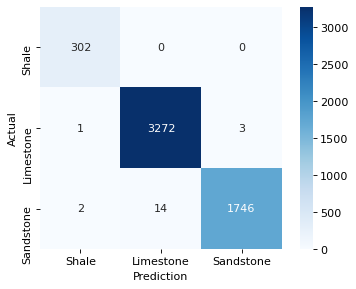

In [56]:
make_confusion_matrix(metrics.confusion_matrix(y_val, gbm.predict(x_val[['DT','GR','NPHI','PEF','RHOB','ROP']], ntree_limit=gbm.best_ntree_limit)))
fig.savefig('Boost_val_matrix.png')

In [57]:
metrics.confusion_matrix(y_test, gbm.predict(x_test[['DT','GR','NPHI','PEF','RHOB','ROP']], ntree_limit=gbm.best_ntree_limit))

array([[ 416,    4,    0],
       [ 175,  590,  245],
       [   0,  140, 1657]])

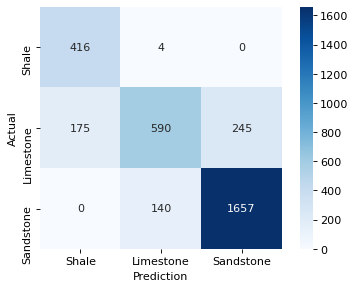

In [58]:
make_confusion_matrix(metrics.confusion_matrix(y_test, gbm.predict(x_test[['DT','GR','NPHI','PEF','RHOB','ROP']], ntree_limit=gbm.best_ntree_limit)))
fig.savefig('Boost_test_matrix.png')

In [59]:
y_predict = gbm.predict(x_test[['DT','GR','NPHI','PEF','RHOB','ROP']], ntree_limit=gbm.best_ntree_limit)

In [60]:
y_predict

array([1., 1., 1., ..., 2., 2., 2.])

In [61]:
well4_df['Lithology_Boost']= pd.Series(y_predict)

<ipython-input-61-2fda37476858>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  well4_df['Lithology_Boost']= pd.Series(y_predict)


In [62]:
print('''Shale recall: {:.4f}
Limestone recall:{:.4f}
Sand recall: {:.4f}
'''.format(
    ((metrics.confusion_matrix(y_test,y_predict)[0][0])/(sum(metrics.confusion_matrix(y_test,y_predict)[0]))), 
    ((metrics.confusion_matrix(y_test,y_predict)[1][1])/(sum(metrics.confusion_matrix(y_test,y_predict)[1]))), 
    ((metrics.confusion_matrix(y_test,y_predict)[2][2])/(sum(metrics.confusion_matrix(y_test,y_predict)[2]))))
     )


Shale recall: 0.9905
Limestone recall:0.5842
Sand recall: 0.9221



In [63]:
f1_score(y_test, y_predict, average = 'micro')

0.825224666873257

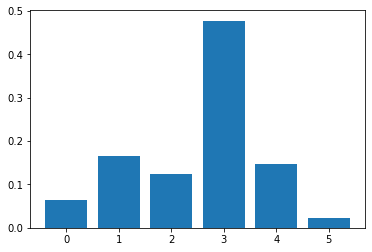

In [64]:
from matplotlib import pyplot
pyplot.bar(range(len(gbm.feature_importances_)), gbm.feature_importances_)
pyplot.show()

# KNN prediction

In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [66]:
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train_val[['DT','GR','NPHI','PEF','RHOB','ROP']], y_train_val, cv=10, scoring='f1_micro')
    k_scores.append(scores.mean())
print(k_scores)

[0.866310203580419, 0.8699167390293748, 0.8641563823908639, 0.8678093396135393, 0.8636879763878291, 0.8656550798621161, 0.8627981562859073, 0.8645309800103499, 0.8636877132507083, 0.8646713855923653, 0.8630321948267243, 0.8650924707698515, 0.8641554614109414, 0.8655136436597111, 0.8635466717539844, 0.8654197475637886, 0.8639679542843108, 0.8646704426843493, 0.8638272855651745, 0.8641085133629801, 0.8639210062363498, 0.8642959327772368, 0.8634528414423421, 0.8648579278828864, 0.8639212474453771, 0.864202497171276, 0.8634998552745836, 0.8635469129630116, 0.8635934882333851, 0.8635937513705059]


In [67]:
np.where(k_scores == max(k_scores))

(array([1]),)

In [68]:
knn = KNeighborsClassifier(n_neighbors=2)

In [69]:
knn.fit(x_train[['DT','GR','NPHI','PEF','RHOB','ROP']],y_train)

KNeighborsClassifier(n_neighbors=2)

In [70]:
y_predict = knn.predict(x_test[['DT','GR','NPHI','PEF','RHOB','ROP']])

In [71]:
metrics.confusion_matrix(y_test,y_predict)

array([[ 418,    1,    1],
       [ 179,  483,  348],
       [   2,  591, 1204]])

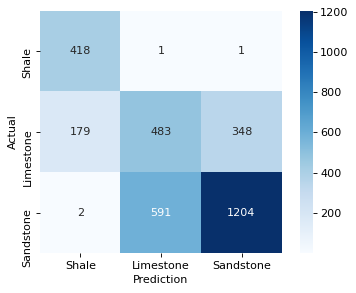

In [72]:
make_confusion_matrix(metrics.confusion_matrix(y_test,y_predict))
fig.savefig('Knn_test_matrix.png')

In [73]:
f1_score(y_test, y_predict, average = 'micro')

0.6523086458010536

In [74]:
well4_df['Lithology_knn']= pd.Series(y_predict)

<ipython-input-74-59572444edc9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  well4_df['Lithology_knn']= pd.Series(y_predict)


# Model results visualization

In [75]:
well4_df.reset_index(drop=True, inplace = True)

In [76]:
well4_df

,DEPTH,DRHO,DT,GR,NPHI,PEF,RHOB,ROP,RT,Lithology,Lithology_rf,Lithology_Boost,Lithology_knn
0,3102.0,0.0517,79.8155,31.5956,0.1390,7.5853,2.5614,11.0552,2.3253,1.0,1.0,1.0,2.0
1,3102.1,0.0525,80.5183,32.6119,0.1452,7.5500,2.5602,11.6189,2.1443,1.0,1.0,1.0,2.0
2,3102.2,0.0530,81.7971,35.0596,0.1488,7.5027,2.5584,12.1826,1.9331,1.0,1.0,1.0,2.0
3,3102.3,0.0535,82.8895,37.2475,0.1485,7.4674,2.5567,12.7405,1.8021,1.0,1.0,1.0,2.0
4,3102.4,0.0541,83.7466,39.2453,0.1522,7.4579,2.5556,12.2827,1.7233,1.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3222,3424.2,0.0557,76.4480,51.6833,0.1875,6.2810,2.4461,29.9912,1.1323,2.0,2.0,2.0,2.0
3223,3424.3,0.0579,76.1982,52.9685,0.1850,6.3838,2.4506,29.9845,1.1693,2.0,2.0,2.0,2.0
3224,3424.4,0.0603,75.8560,54.0012,0.1785,6.4731,2.4563,29.9778,1.1792,2.0,2.0,2.0,2.0
3225,3424.5,0.0603,75.5494,52.6933,0.1777,6.5220,2.4590,29.9621,1.2081,2.0,2.0,2.0,2.0


<ipython-input-77-222738d16224>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  well.sort_values(by = ['DEPTH'], ascending = True, inplace = True)
<ipython-input-77-222738d16224>:52: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(1.1)


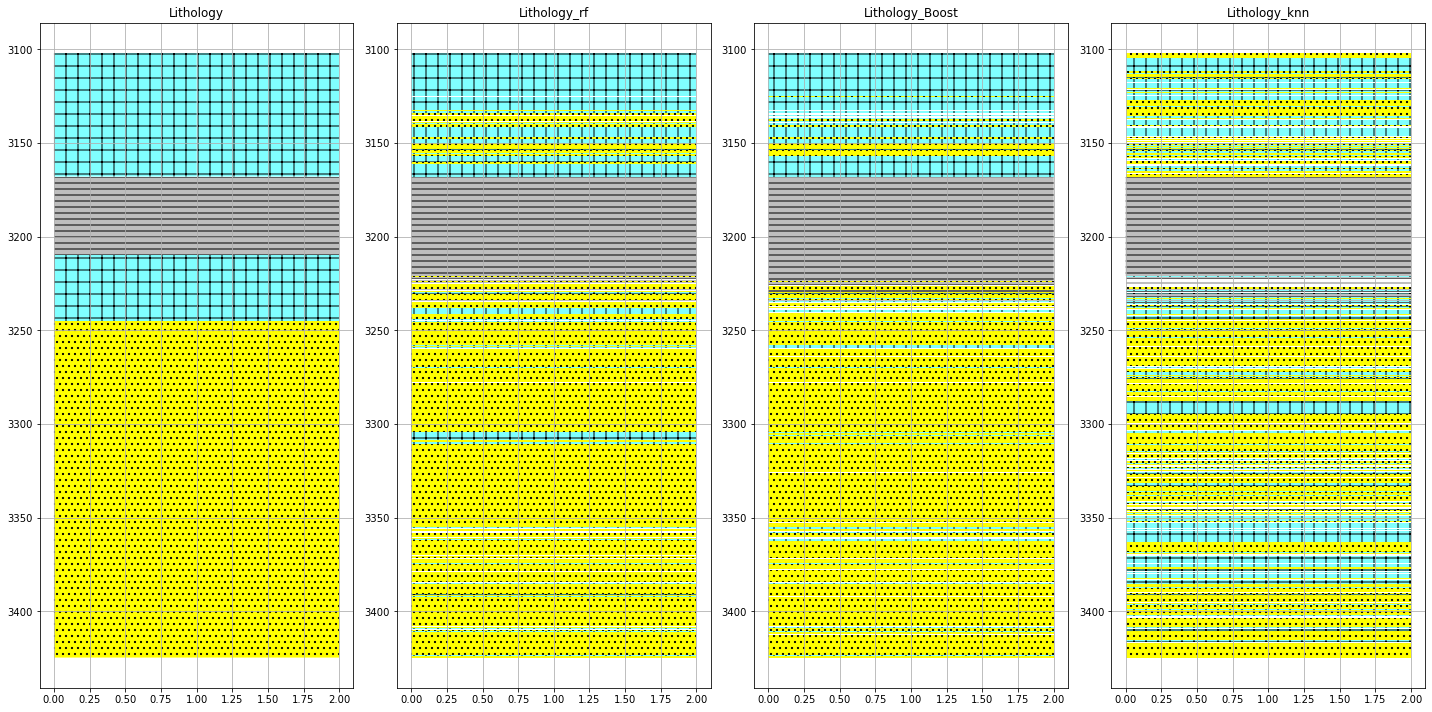

In [77]:
well = well4_df
well.sort_values(by = ['DEPTH'], ascending = True, inplace = True)
logs = ['Lithology', 'Lithology_rf', 'Lithology_Boost', 'Lithology_knn']

# create the subplots; ncols equals the number of logs
fig, ax = plt.subplots(nrows=1, ncols=len(logs), figsize=(20,10))

# looping each log to display in the subplots

colors = ['black', 'black', 'black', 'black']

for i in range(len(logs)):
    if i == 0:
        for key in lithology_numbers.keys():
            color = lithology_numbers[key]['color']
            hatch = lithology_numbers[key]['hatch']
            ax[i].fill_betweenx(well['DEPTH'], 0, well["Lithology"], where=(well["Lithology"]==key),
                         facecolor=color, hatch=hatch)
            ax[i].fill_betweenx(well['DEPTH'], 2, well["Lithology"], where=(well["Lithology"]==key),
                         facecolor=color, hatch=hatch)
        
    elif i ==1:
        for key in lithology_numbers.keys():
            color = lithology_numbers[key]['color']
            hatch = lithology_numbers[key]['hatch']
            ax[i].fill_betweenx(well['DEPTH'], 0, well["Lithology_rf"], where=(well["Lithology_rf"]==key),
                         facecolor=color, hatch=hatch)
            ax[i].fill_betweenx(well['DEPTH'], 2, well["Lithology_rf"], where=(well["Lithology_rf"]==key),
                         facecolor=color, hatch=hatch)
    elif i==2:
        for key in lithology_numbers.keys():
            color = lithology_numbers[key]['color']
            hatch = lithology_numbers[key]['hatch']
            ax[i].fill_betweenx(well['DEPTH'], 0, well["Lithology_Boost"], where=(well["Lithology_Boost"]==key),
                         facecolor=color, hatch=hatch)
            ax[i].fill_betweenx(well['DEPTH'], 2, well["Lithology_Boost"], where=(well["Lithology_Boost"]==key),
                         facecolor=color, hatch=hatch)
    elif i == 3:
        for key in lithology_numbers.keys():
            color = lithology_numbers[key]['color']
            hatch = lithology_numbers[key]['hatch']
            ax[i].fill_betweenx(well['DEPTH'], 0, well["Lithology_knn"], where=(well["Lithology_knn"]==key),
                         facecolor=color, hatch=hatch)
            ax[i].fill_betweenx(well['DEPTH'], 2, well["Lithology_knn"], where=(well["Lithology_knn"]==key),
                         facecolor=color, hatch=hatch)
  
    ax[i].set_title(logs[i])
    ax[i].grid(True)
    ax[i].axes.invert_yaxis()


plt.tight_layout(1.1)
plt.show()
fig.savefig('Lith_predictions.png')